In [141]:
import os

import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score


diff_dataset = False

data_path = Path("../../data").resolve()
os.makedirs(data_path, exist_ok=True)

tracks_df = pd.read_parquet(data_path / "tracks.pq")

## Target variable analysis

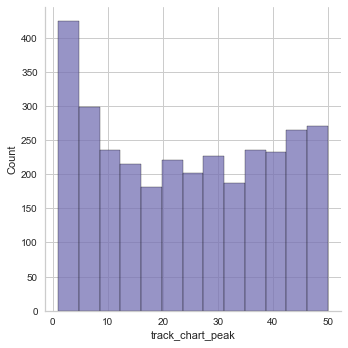

In [142]:
sns.displot(tracks_df["track_chart_peak"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_chart_months', ylabel='Density'>

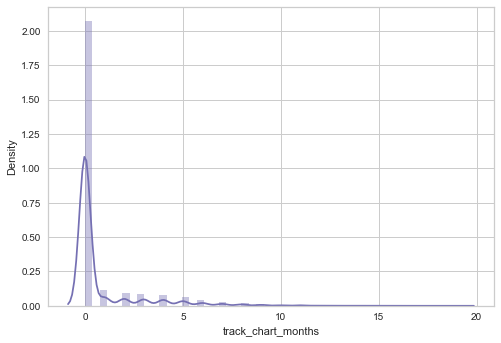

In [143]:
sns.distplot((tracks_df["track_chart_months"]))

In [144]:
print(len(tracks_df[tracks_df["track_chart_months"] > 5]))
print(len(tracks_df[tracks_df["track_chart_months"] > 4]))
print(len(tracks_df[tracks_df["track_chart_months"] > 3]))
print(len(tracks_df[tracks_df["track_chart_months"] > 2]))
print(len(tracks_df[tracks_df["track_chart_months"] > 1]))
print(len(tracks_df[tracks_df["track_chart_months"] == 1]))

671
1035
1498
2000
2545
650


In [145]:
def chart_status(track):
    if track["track_chart_peak"] == 1:
        return "peaked"
    elif track["track_chart_months"] > 3:
        return "charted_3months"
    elif track["track_chart_months"] >= 1:
        return "charted"
    else:
        return "uncharted"


def chart_months(track):
    return track["track_chart_months"] if track["track_chart_months"] <= 5 else 5


tracks_df["chart_status"] = tracks_df.apply(chart_status, axis=1)
tracks_df["chart_months"] = tracks_df.apply(chart_months, axis=1)

audio_features = [
    "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "time_signature",
    "chart_months", "chart_status",
]


## Audio feature analysis

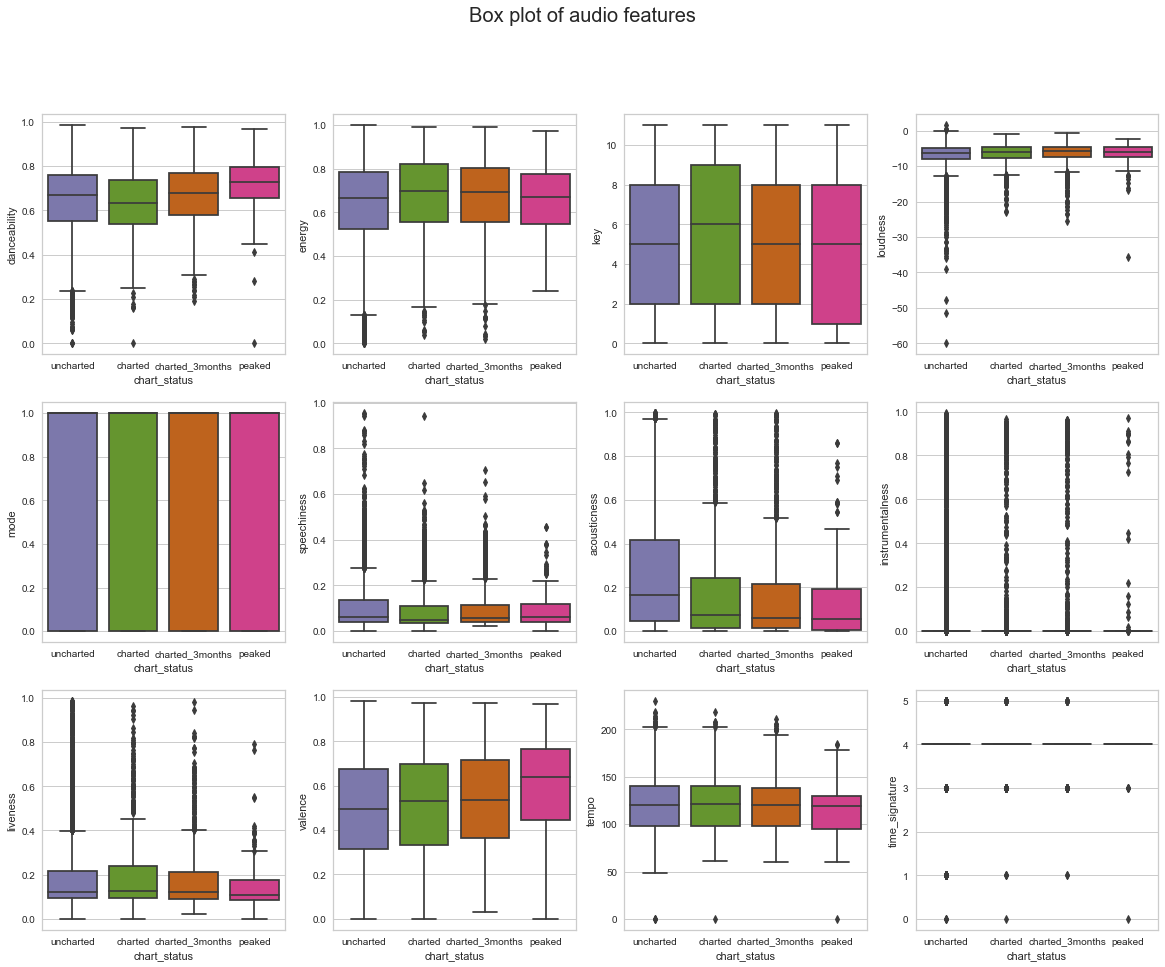

In [146]:
import matplotlib.pyplot as plt

# df_ = tracks_df[tracks_df["chart_status"] != "uncharted"][audio_features]
df_ = tracks_df[audio_features]


#sns.kdeplot(data=df_, x="danceability", hue="chart_status")

ncols = 4
nrows = int(len(audio_features) / 4)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Box plot of audio features", fontsize=20)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(audio_features):
            break
        sns.boxplot(data=df_, x="chart_status", y=audio_features[idx], ax=axs[row, col],
                    order=["uncharted", "charted", "charted_3months", "peaked"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

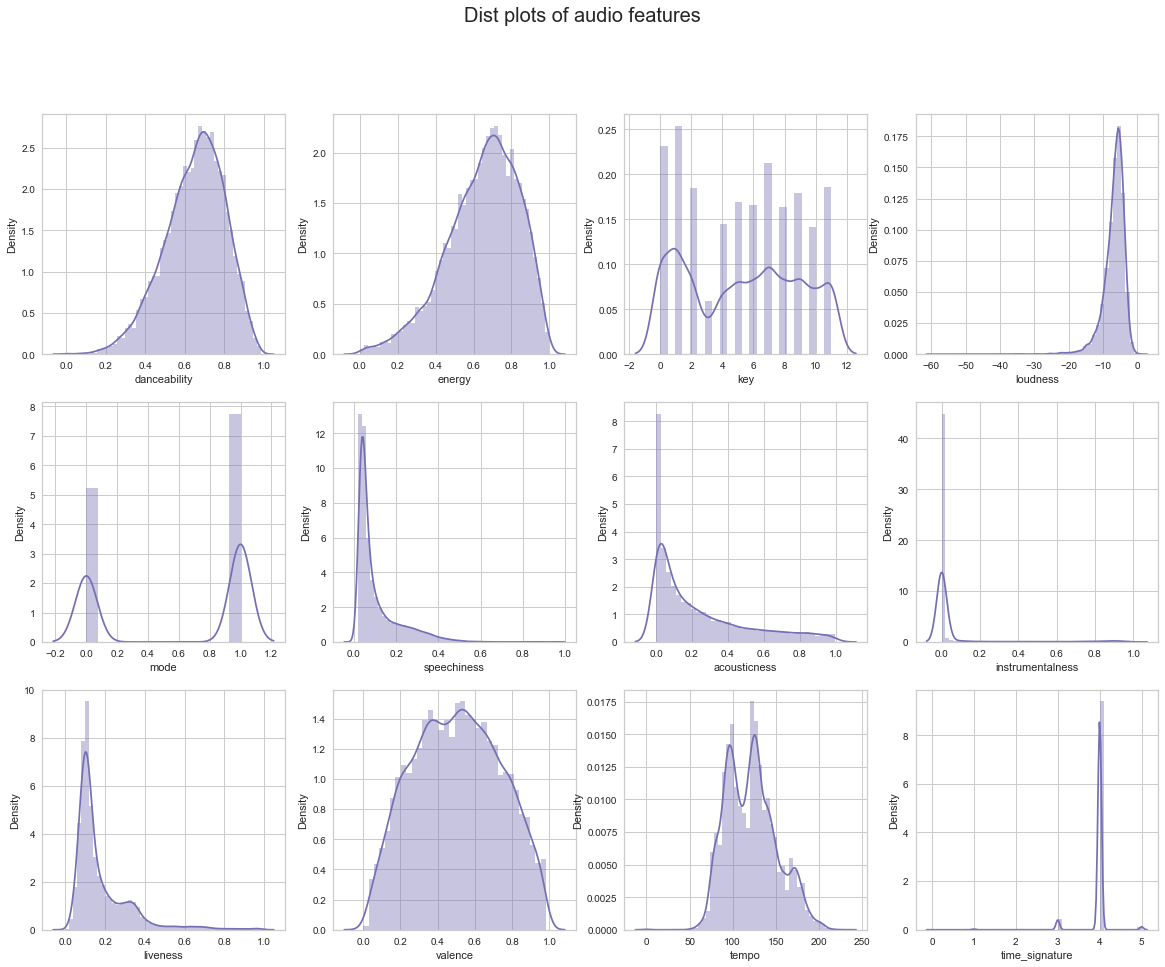

In [147]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Dist plots of audio features", fontsize=20)

ncols = 4
nrows = int(len(audio_features) / 4)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(audio_features):
            break
        sns.distplot(df_[audio_features[idx]], ax=axs[row, col]),
                    #order=["uncharted", "charted", "charted_3months", "peaked"])

<AxesSubplot:xlabel='tempo', ylabel='Density'>

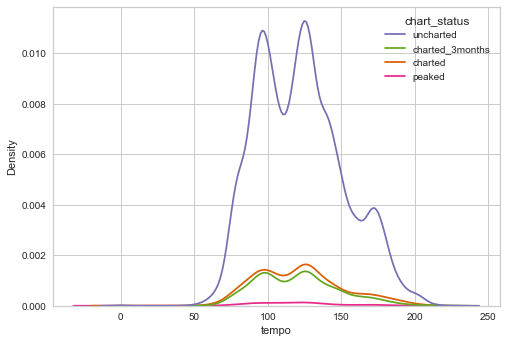

In [131]:
sns.kdeplot(data=df_, x="tempo", hue="chart_status")

In [132]:
tracks_df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'duration_ms', 'year',
       'release_date', 'popularity', 'audio_features', 'isrc', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_chart_months', 'track_chart_indicativerevenue',
       'track_chart_peak', 'track_chart_mean', 'track_chart_median',
       'recording_award_category', 'recording_award_nominee',
       'recording_award_winner', 'album_award_category', 'album_award_nominee',
       'album_award_winner', 'num_artists', 'artist_matched', 'artist_names',
       'artist_genres', 'artist_popularity', 'artist_first_release',
       'artist_lifetime_releases', 'artist_gender', 'artist_country',
       'artist_hometown', 'artist_first_win', 'artist_first_nomination',
       'artist_lifetime_wins', 'artist_lifetime_nominations',
    

## Artist feature analysis

In [133]:
tracks_df["has_female_artist"] = tracks_df["artist_gender"].apply(lambda gender: int("female" in gender))

artist_features = [
    #"artist_first_release",
    # "has_female_artist",
    #"artist_first_win",
    #"artist_first_nomination",
    #"artist_first_chart_year",
    "artist_chart_tracks",
    #"artist_chart_peak",
    "artist_nominations",
    "artist_wins",
    "artist_releases",
    "artist_chart_months",
    "artist_chart_months_recently",
    "artist_releases_recently",
    "major_label",
]

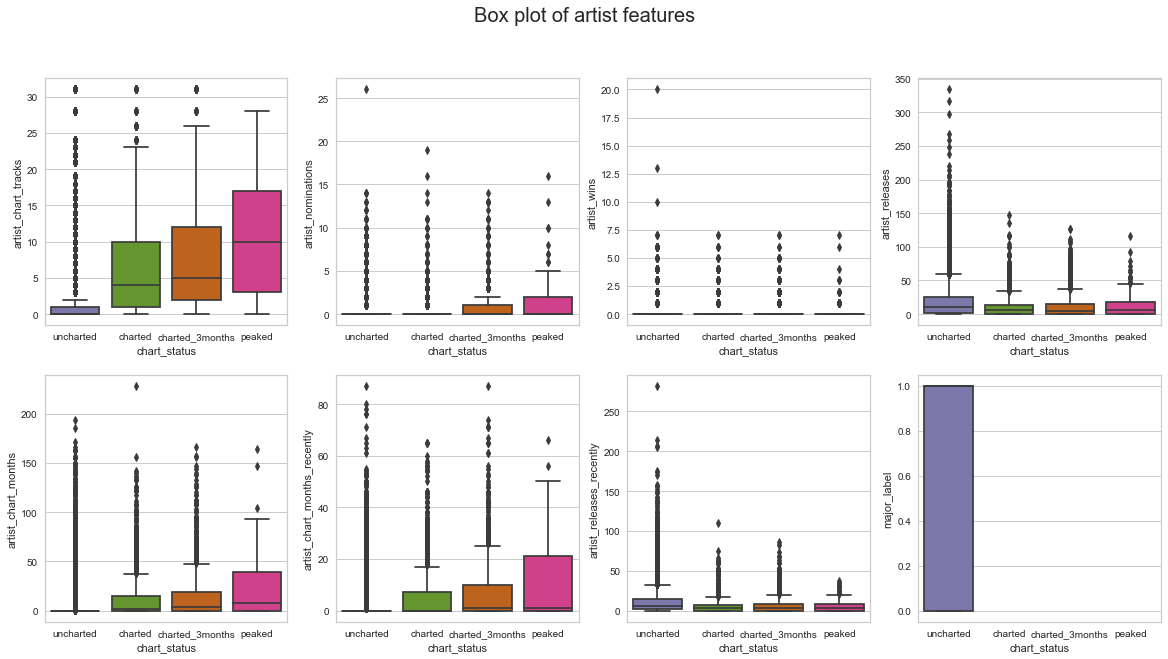

In [134]:
ncols = 4
nrows = int(len(artist_features) / 4)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Box plot of artist features", fontsize=20)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(artist_features):
            break
        sns.boxplot(data=tracks_df, x="chart_status", y=artist_features[idx], ax=axs[row, col],
                    order=["uncharted", "charted", "charted_3months", "peaked"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

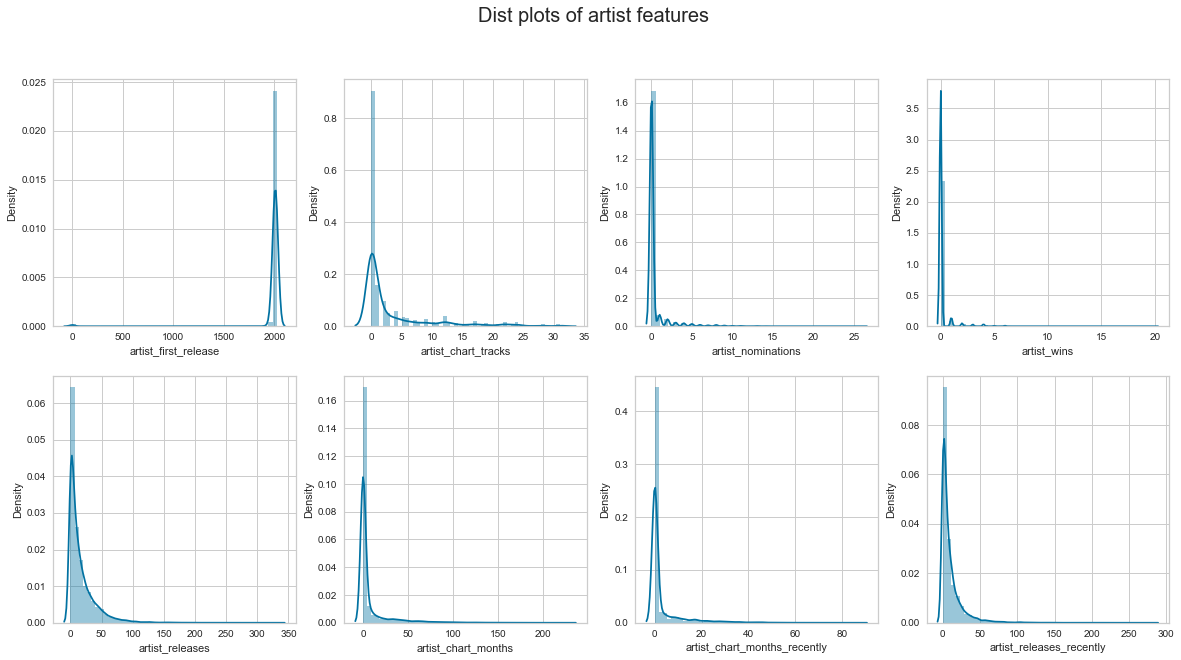

In [12]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Dist plots of artist features", fontsize=20)

ncols = 4
nrows = int(len(artist_features) / 4)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(artist_features):
            break
        sns.distplot(tracks_df[artist_features[idx]], ax=axs[row, col]),
        #order=["uncharted", "charted", "charted_3months", "peaked"])

## Null model

In [13]:
# null model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

model_df = tracks_df[artist_features + ["track_chart_months"]].drop(columns="major_label")
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

accuracy = accuracy_score(y_test, [1] * len(y_test))
precision = precision_score(y_test,  [1] * len(y_test))
f1 = f1_score(y_test,  [1] * len(y_test))

print(f"null score: accuracy={1 - accuracy:.5f}, precision={1 - precision:.5f}, f1={1 - f1:.5f}")

null score: accuracy=0.79198, precision=0.79198, f1=0.65560


In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8897, 8), (8897,), (5932, 8), (5932,))

## Artist features classification model report

train score: 0.80364, accuracy=0.80364, precision=0.51818, f1=0.55354
test score: 0.79754, accuracy=0.79754, precision=0.51129, f1=0.55436


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


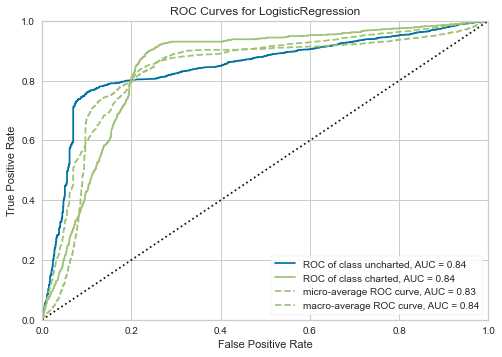

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


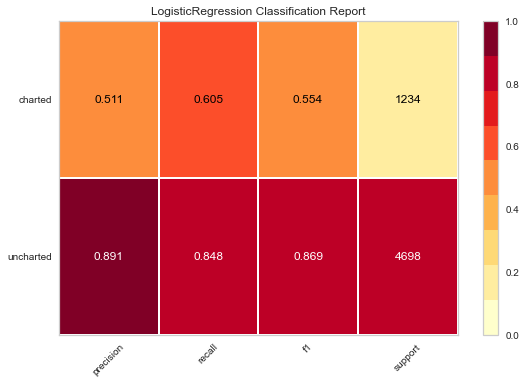

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


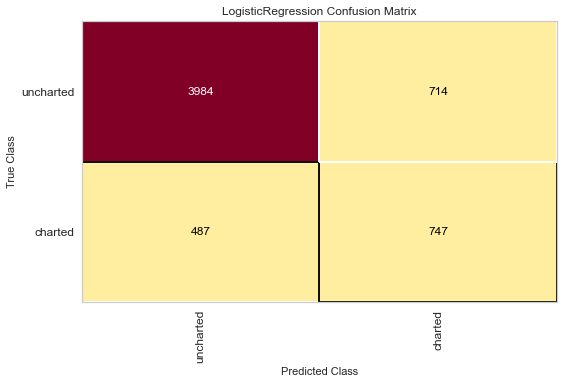

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


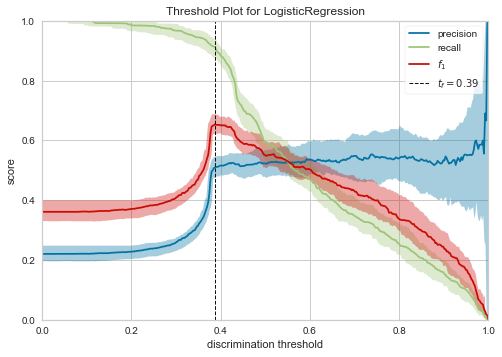

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


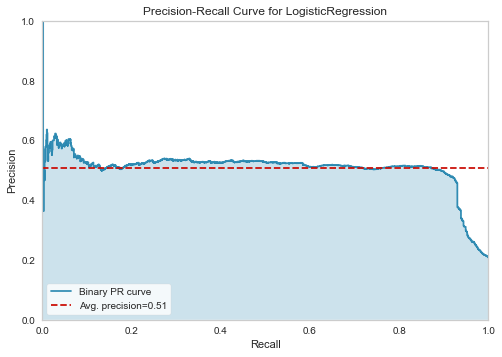

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [15]:
model_df = tracks_df[artist_features + ["track_chart_months"]].drop(columns="major_label")
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

lr_artist = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_artist.fit(X_train, y_train)

train_score = lr_artist.score(X_train, y_train)
test_score = lr_artist.score(X_test, y_test)

train_accuracy = accuracy_score(y_train, lr_artist.predict(X_train))
train_precision = precision_score(y_train, lr_artist.predict(X_train))
train_f1 = f1_score(y_train, lr_artist.predict(X_train))

test_accuracy = accuracy_score(y_test, lr_artist.predict(X_test))
test_precision = precision_score(y_test, lr_artist.predict(X_test))
test_f1 = f1_score(y_test, lr_artist.predict(X_test))

print(f"train score: {train_score:.5f}, accuracy={train_accuracy:.5f}, precision={train_precision:.5f}, f1={train_f1:.5f}")
print(f"test score: {test_score:.5f}, accuracy={test_accuracy:.5f}, precision={test_precision:.5f}, f1={test_f1:.5f}")

# model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(lr_artist, classes=["uncharted", "charted"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ClassificationReport(lr_artist, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ConfusionMatrix(lr_artist, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = DiscriminationThreshold(lr_artist, exclude=["queue_rate"])
visualizer.fit(X_test, y_test)
visualizer.show()

viz = PrecisionRecallCurve(lr_artist)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [16]:
(y_test == 0).sum()

4698

In [17]:
pd.DataFrame(np.exp(lr_artist.coef_), columns=X.columns)

,artist_first_release,artist_chart_tracks,artist_nominations,artist_wins,artist_releases,artist_chart_months,artist_chart_months_recently,artist_releases_recently
0,0.999693,1.282659,0.997451,0.742965,1.008946,0.97044,1.025539,0.951757


## Audio features classification model report

train score: 0.80364, accuracy=0.57408, precision=0.29271, f1=0.40809
test score: 0.79754, accuracy=0.55769, precision=0.26752, f1=0.38115


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


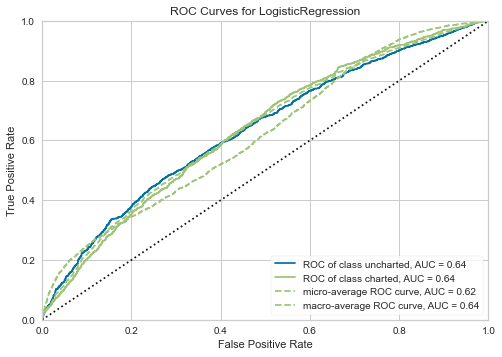

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


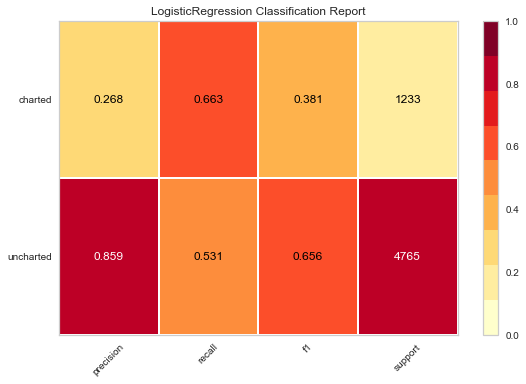

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


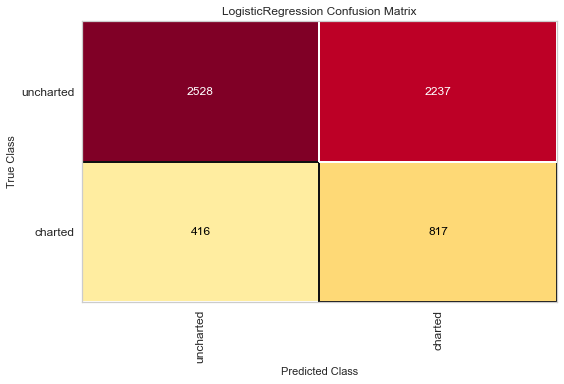

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


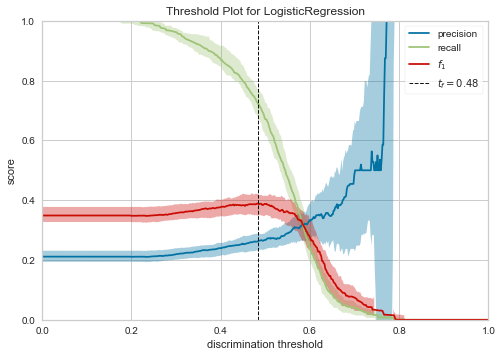

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


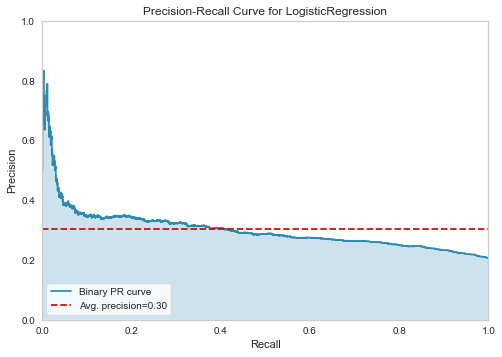

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [18]:
# model using audio features...

model_df = tracks_df[audio_features + ["track_chart_months"]].drop(columns=["chart_status", "chart_months"])
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

lr_audio = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_audio.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, lr_audio.predict(X_train))
train_precision = precision_score(y_train, lr_audio.predict(X_train))
train_f1 = f1_score(y_train, lr_audio.predict(X_train))

test_accuracy = accuracy_score(y_test, lr_audio.predict(X_test))
test_precision = precision_score(y_test, lr_audio.predict(X_test))
test_f1 = f1_score(y_test, lr_audio.predict(X_test))

print(f"train score: {train_score:.5f}, accuracy={train_accuracy:.5f}, precision={train_precision:.5f}, f1={train_f1:.5f}")
print(f"test score: {test_score:.5f}, accuracy={test_accuracy:.5f}, precision={test_precision:.5f}, f1={test_f1:.5f}")

visualizer = ROCAUC(lr_audio, classes=["uncharted", "charted"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ClassificationReport(lr_audio, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ConfusionMatrix(lr_audio, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = DiscriminationThreshold(lr_audio, exclude=["queue_rate"])
visualizer.fit(X_test, y_test)
visualizer.show()

viz = PrecisionRecallCurve(lr_audio)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [19]:
pd.DataFrame(np.exp(lr_audio.coef_), columns=X.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.456754,0.426028,1.016208,0.996688,1.196179,0.631735,0.108781,2.87017,0.842262,2.618475,0.997132,1.258815


## Feature importance

(14996, 71) (14828, 21)
class balance: 0.21


,feature,importance
1,artist_chart_tracks,0.247060
5,artist_chart_months,0.076605
0,artist_first_release,0.072556
4,artist_releases,0.060682
14,acousticness,0.053123
7,artist_releases_recently,0.050031
6,artist_chart_months_recently,0.049346
13,speechiness,0.047446
9,energy,0.045377
11,loudness,0.044439


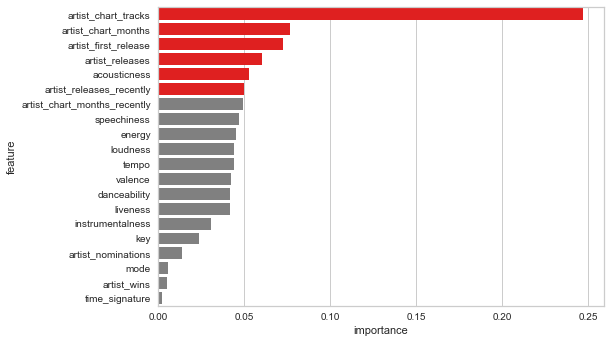

In [20]:
# chart for one month
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model_df = tracks_df[artist_features + audio_features + ["track_chart_months"]].drop(columns=["chart_status", "chart_months", "major_label"])
model_df = model_df.dropna()
print(tracks_df.shape, model_df.shape)

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)
class_balance = (y == 1).sum() / len(y)
print(f"class balance: {class_balance:.02}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(
        list(zip(X.columns, rf.feature_importances_)),
        columns=["feature", "importance"]
    ).sort_values("importance", ascending=False)

sns.barplot(x="importance", y="feature", data=feature_importances,
            palette=np.where(feature_importances["importance"] >= 0.05, "red", "gray"))

feature_importances

class balance: 0.13


,feature,importance
1,artist_chart_tracks,0.159745
5,artist_chart_months,0.064185
14,acousticness,0.063708
13,speechiness,0.059735
11,loudness,0.058977
9,energy,0.058966
17,valence,0.058791
0,artist_first_release,0.058659
8,danceability,0.057535
18,tempo,0.057331


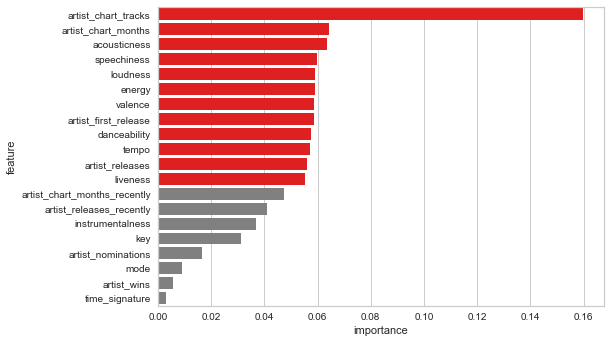

In [21]:
# chart for at least 3 months
X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 3).astype(int)
class_balance = (y == 1).sum() / len(y)
print(f"class balance: {class_balance:.02}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(
    list(zip(X.columns, rf.feature_importances_)),
    columns=["feature", "importance"]
).sort_values("importance", ascending=False)

sns.barplot(x="importance", y="feature", data=feature_importances,
            palette=np.where(feature_importances["importance"] >= 0.05, "red", "gray"))

feature_importances

class balance: 0.044, samples=657


,feature,importance
1,artist_chart_tracks,0.085563
8,danceability,0.075144
18,tempo,0.074952
14,acousticness,0.072028
17,valence,0.070863
13,speechiness,0.069891
16,liveness,0.069508
11,loudness,0.069446
9,energy,0.065584
0,artist_first_release,0.050762


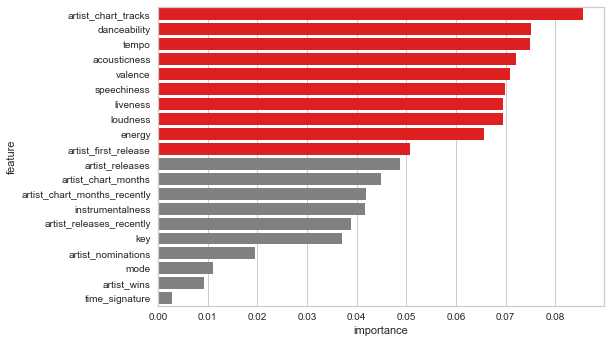

In [22]:
# chart for at least 6 months
X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 6).astype(int)
class_balance = (y == 1).sum()
print(f"class balance: {class_balance / len(y):.02}, samples={class_balance}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(
    list(zip(X.columns, rf.feature_importances_)),
    columns=["feature", "importance"]
).sort_values("importance", ascending=False)

sns.barplot(x="importance", y="feature", data=feature_importances,
            palette=np.where(feature_importances["importance"] >= 0.05, "red", "gray"))

feature_importances

,feature,importance
0,artist_chart_tracks,0.089171
13,acousticness,0.081352
16,valence,0.080345
10,loudness,0.076322
12,speechiness,0.075747
7,danceability,0.075484
15,liveness,0.075060
8,energy,0.074980
17,tempo,0.071631
3,artist_releases,0.048726


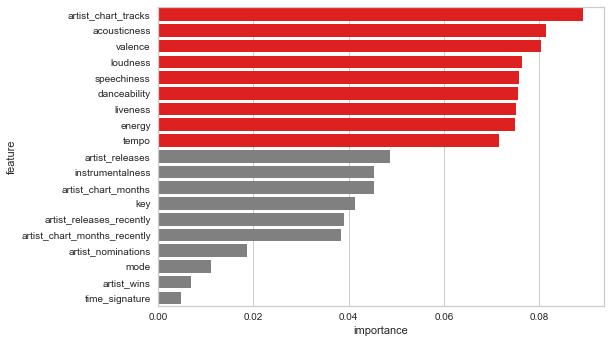

class balance: 0.0029


,feature,importance
16,valence,0.089107
15,liveness,0.086591
12,speechiness,0.084344
13,acousticness,0.082580
17,tempo,0.080344
10,loudness,0.079640
7,danceability,0.075752
8,energy,0.069665
3,artist_releases,0.050001
14,instrumentalness,0.047271


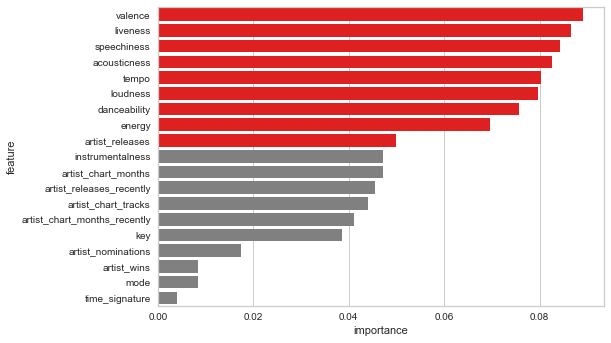

In [151]:
# chart for at least 12 months
model_df = tracks_df[artist_features + audio_features + ["track_chart_months"]].drop(columns=["chart_status", "chart_months", "major_label"])
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 12).astype(int)
class_balance = (y == 1).sum() / len(y)
print(f"class balance: {class_balance:.02}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(
    list(zip(X.columns, rf.feature_importances_)),
    columns=["feature", "importance"]
).sort_values("importance", ascending=False)

sns.barplot(x="importance", y="feature", data=feature_importances,
            palette=np.where(feature_importances["importance"] >= 0.05, "red", "gray"))

feature_importances

In [24]:
# probably ignore this hot garbage
from sklearn.feature_selection import RFECV

rfe = RFECV(rf, cv=5, scoring="precision")

rfe.fit(X_train, y_train)

selected_features = np.array(X.columns)[rfe.get_support()]

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-pack

RFECV(cv=5, estimator=RandomForestClassifier(random_state=42),
      scoring='precision')

In [32]:
# ignore
def scorer(estimator, X, y):
    return precision_score(y, estimator.predict(X), average="binary", pos_label=1)

min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(5),
    scoring="precision", # scorer,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-pack

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='precision')

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


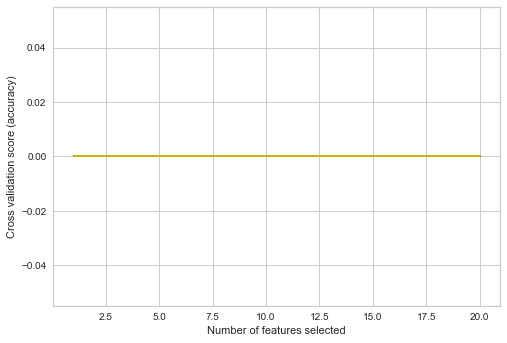

In [39]:
# ignore
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [40]:
# ignore
selected_features = np.array(X.columns)[rfe.get_support()]
selected_features

array(['tempo'], dtype=object)

class balance: 0.21


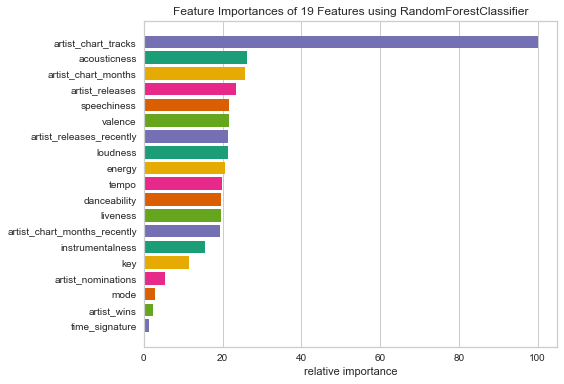

class balance: 0.0029


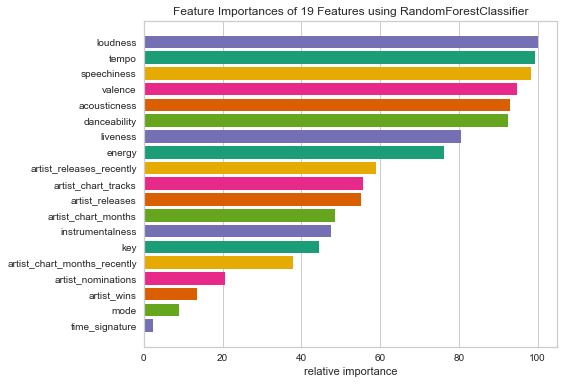

<AxesSubplot:title={'center':'Feature Importances of 19 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [153]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)
class_balance = (y == 1).sum() / len(y)
print(f"class balance: {class_balance:.02}")

model = RandomForestClassifier(n_estimators=100)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 12).astype(int)
class_balance = (y == 1).sum() / len(y)
print(f"class balance: {class_balance:.02}")

model = RandomForestClassifier(n_estimators=100)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

KeyboardInterrupt: 

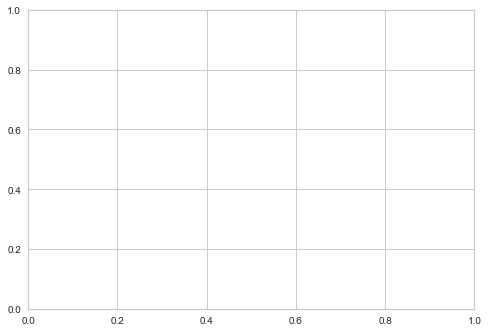

In [ ]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV

# visualizer = RFECV(SVC(kernel='linear', C=1))
# visualizer.fit(X, y)
# visualizer.show()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='precision')
visualizer.fit(X, y)
visualizer.show()

## Revenue Analysis

According to Chart2000: "rough guess is that each unit of Indicative Revenue score represents something like $5,000 of TOTAL revenue generated across the **whole music delivery chain** (in year 2000 dollars). It is reasonable to expect that artists will get at the very most about 10% of this revenue."

In [42]:
df_ = tracks_df.copy()
df_["revenue_est_total"] = df_["track_chart_indicativerevenue"] * 5000.0 / 1000.0
df_["revenue_est_artist"] = df_["revenue_est_total"] * .10
df_["revenue_est_total"].describe()

count     14996.000000
mean       5548.868022
std       15713.359575
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      270898.290000
Name: revenue_est_total, dtype: float64

In [43]:
df_[["artists", "name", "revenue_est_total"]].sort_values(["revenue_est_total"], ascending=False)

,artists,name,revenue_est_total
14520,The Weeknd,Blinding Lights,270898.290
969,Ed Sheeran,Shape of You,164355.470
4177,Lewis Capaldi,Someone You Loved,164177.095
13870,Post Malone,Circles,161989.040
11164,Billie Eilish,bad guy,152528.525
...,...,...,...
5627,The Asteroids Galaxy Tour,Crazy,0.000
5630,Dwayne Johnson,You're Welcome,0.000
5632,Yo Gotti,Down In the DM,0.000
5633,Gleb,Go Go Go,0.000


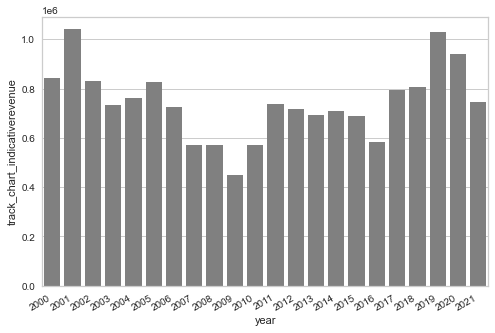

In [44]:
year_revenue = (
    tracks_df
        .groupby("year")
        .aggregate({"track_chart_indicativerevenue": "sum"})
        .reset_index()
)
year_revenue = year_revenue[year_revenue["year"] != 2022]
plot = sns.barplot(x="year", y="track_chart_indicativerevenue", data=year_revenue, color="gray")
plot.get_figure().autofmt_xdate()

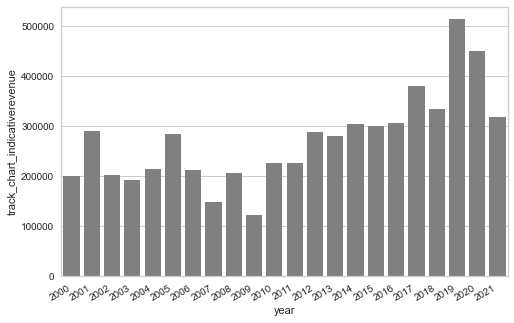

In [51]:
year_revenue = (
    tracks_df
        [tracks_df["track_chart_months"] > 6]
        .groupby("year")
        .aggregate({"track_chart_indicativerevenue": "sum"})
        .reset_index()
)
year_revenue = year_revenue[year_revenue["year"] != 2022]
plot = sns.barplot(x="year", y="track_chart_indicativerevenue", data=year_revenue, color="gray")
plot.get_figure().autofmt_xdate()

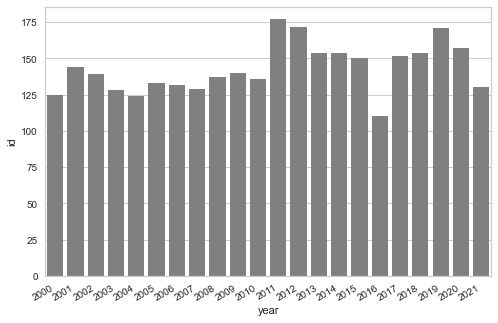

In [45]:
year_count = (
    tracks_df
        [tracks_df["track_chart_months"] > 0]
        .groupby("year")
        .aggregate({"id": "count"})
        .reset_index()
)
year_count = year_count[year_count["year"] != 2022]
plot = sns.barplot(x="year", y="id", data=year_count, color="gray")
plot.get_figure().autofmt_xdate()

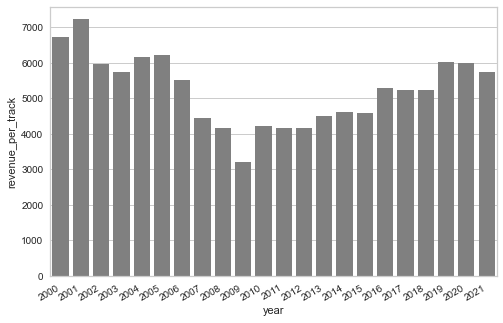

In [46]:
# normalized revenue
year_revenue = (
    tracks_df
        [tracks_df["track_chart_months"] > 0]
        .groupby("year")
        .aggregate({
            "track_chart_indicativerevenue": "sum",
            "id": "count",
        })
        .reset_index()
)
year_revenue = year_revenue[year_revenue["year"] != 2022]
year_revenue["revenue_per_track"] = year_revenue["track_chart_indicativerevenue"] / year_revenue["id"]
plot = sns.barplot(x="year", y="revenue_per_track", data=year_revenue, color="gray")
plot.get_figure().autofmt_xdate()

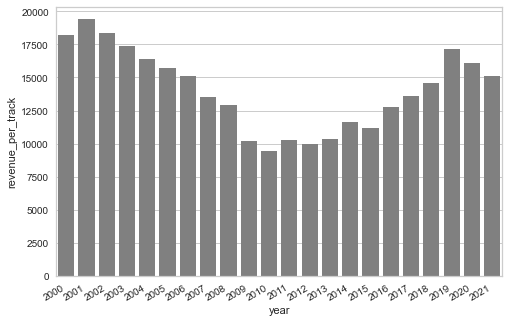

In [52]:
# normalized revenue
year_revenue = (
    tracks_df
    [tracks_df["track_chart_months"] > 6]
        .groupby("year")
        .aggregate({
        "track_chart_indicativerevenue": "sum",
        "id": "count",
    })
        .reset_index()
)
year_revenue = year_revenue[year_revenue["year"] != 2022]
year_revenue["revenue_per_track"] = year_revenue["track_chart_indicativerevenue"] / year_revenue["id"]
plot = sns.barplot(x="year", y="revenue_per_track", data=year_revenue, color="gray")
plot.get_figure().autofmt_xdate()

## Charts Analysis

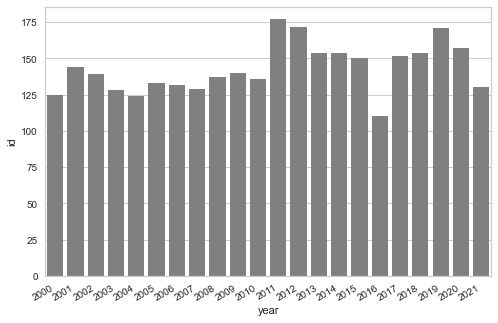

In [47]:
# number of charting songs per year
year_charts = (
    tracks_df
    [tracks_df["track_chart_months"] > 0]
        .groupby("year")
        .aggregate({
            "track_chart_months": "sum",
            "id": "count",
        })
        .reset_index()
)
year_charts = year_charts[year_charts["year"] != 2022]
plot = sns.barplot(x="year", y="id", data=year_charts, color="gray")
plot.get_figure().autofmt_xdate()

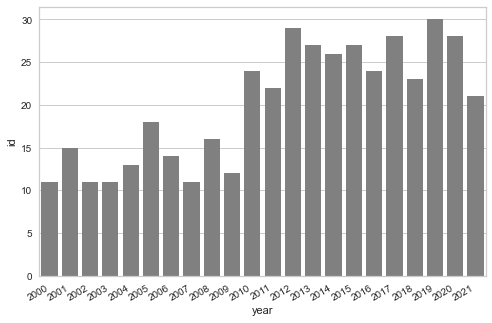

In [48]:
# number of 6+ months charting songs per year
year_charts = (
    tracks_df
    [tracks_df["track_chart_months"] > 6]
        .groupby("year")
        .aggregate({
            "track_chart_months": "sum",
            "id": "count",
    })
    .reset_index()
)
year_charts = year_charts[year_charts["year"] != 2022]
plot = sns.barplot(x="year", y="id", data=year_charts, color="gray")
plot.get_figure().autofmt_xdate()

In [50]:
(
    tracks_df
        [tracks_df["track_chart_months"] > 6]
        .sort_values(["year", "track_chart_months"], ascending=(True, False))
        [["year", "name", "artists", "track_chart_months"]]
)

,year,name,artists,track_chart_months
2500,2000,Hanging By A Moment,Lifehouse,11.0
8362,2000,Kryptonite,3 Doors Down,10.0
8653,2000,In the End,Linkin Park,9.0
9465,2000,I Hope You Dance,Lee Ann Womack,9.0
6228,2000,Bent,Matchbox Twenty,8.0
...,...,...,...,...
959,2022,Castle On the Hill,Ed Sheeran,8.0
7016,2022,I Knew You Were Trouble (Taylor's Version),Taylor Swift,8.0
7936,2022,Telephone - w/o Beyonce,Lady Gaga,8.0
6522,2022,Break My Heart,Dua Lipa,7.0


## Audio feature analysis

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_chart_months'],
      dtype='object')
(14996, 71) (14995, 13)


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/yellowbrick/features/radviz.py:199: RuntimeWarning: invalid value encountered in true_divide
  xy = (s * row_).sum(axis=0) / row.sum()


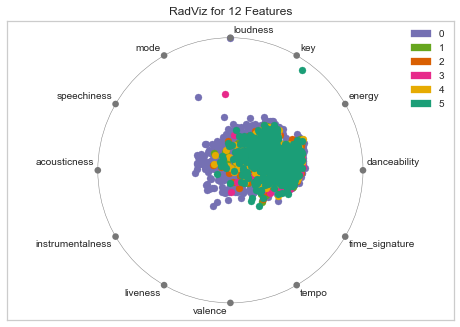

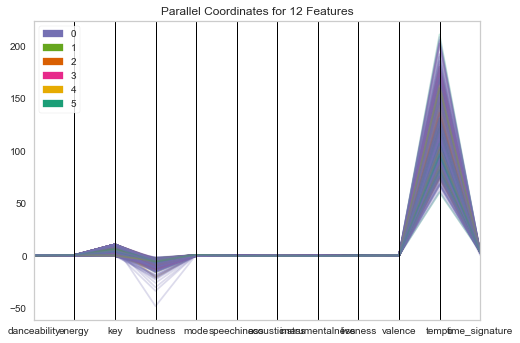

<AxesSubplot:title={'center':'Parallel Coordinates for 12 Features'}>

In [106]:
from yellowbrick.features import ParallelCoordinates, PCA, RadViz
from yellowbrick.style import set_palette

set_palette('dark')

model_df = tracks_df[audio_features + ["track_chart_months"]].drop(columns=["chart_status", "chart_months"])
model_df["track_chart_months"] = model_df["track_chart_months"].apply(lambda v: 5 if v > 5 else v)
model_df = model_df.dropna().reset_index(drop=True)
print(model_df.columns)
print(tracks_df.shape, model_df.shape)

X = model_df.drop(columns=["track_chart_months"]).reset_index(drop=True)
y = model_df["track_chart_months"]

# classes = [0, 1]
classes = [0, 1, 2, 3, 4, 5]
visualizer = RadViz(classes=classes)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

visualizer = ParallelCoordinates(
    classes=classes, features=X.columns, sample=0.05, shuffle=True, random_state=42
)
visualizer.fit_transform(X, y)
visualizer.show()

## Artist feature analysis

Index(['artist_chart_tracks', 'artist_nominations', 'artist_wins',
       'artist_releases', 'artist_chart_months',
       'artist_chart_months_recently', 'artist_releases_recently',
       'track_chart_months'],
      dtype='object')
(14996, 71) (14996, 8)


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/yellowbrick/features/radviz.py:199: RuntimeWarning: invalid value encountered in true_divide
  xy = (s * row_).sum(axis=0) / row.sum()


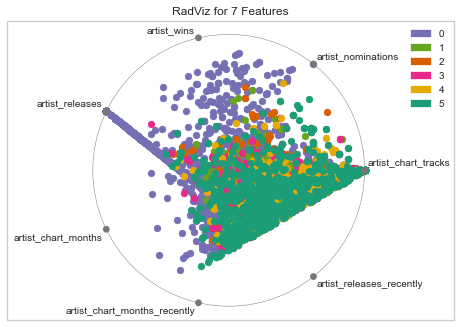

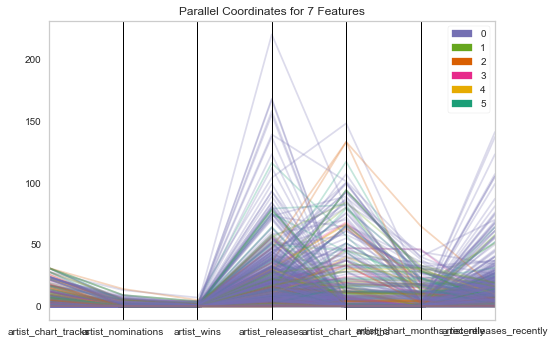

<AxesSubplot:title={'center':'Parallel Coordinates for 7 Features'}>

In [109]:
from yellowbrick.features import ParallelCoordinates, RadViz
from yellowbrick.style import set_palette

set_palette('dark')

model_df = tracks_df[artist_features + ["track_chart_months"]].drop(columns="major_label")
model_df["track_chart_months"] = model_df["track_chart_months"].apply(lambda v: 5 if v > 5 else v)
model_df = model_df.dropna().reset_index(drop=True)
print(model_df.columns)
print(tracks_df.shape, model_df.shape)

X = model_df.drop(columns=["track_chart_months"])
y = model_df["track_chart_months"]

classes = [0, 1, 2, 3, 4, 5]
visualizer = RadViz(classes=classes)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

visualizer = ParallelCoordinates(
    classes=classes, features=X.columns, sample=0.05, shuffle=True, random_state=42
)
visualizer.fit_transform(X, y)
visualizer.show()